<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(0)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n20.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.328430,27.452828,44.862950,-1.230360,179.413847,180.431814,-1.017966
1,0.0,1.0,75.643252,30.785884,75.232337,0.098880,191.760353,191.573811,0.186542
2,0.0,2.0,89.052622,66.096637,74.705056,-0.974384,238.879931,239.465381,-0.585450
3,0.0,3.0,47.644629,56.391165,78.416916,-0.388558,192.064152,192.373377,-0.309224
4,0.0,4.0,77.730555,44.872873,33.884470,-0.427953,166.059945,166.286157,-0.226211
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.205923,54.773130,88.973740,-1.191668,231.761126,232.786825,-1.025699
19996,999.0,16.0,90.474790,24.527720,42.131852,2.146406,169.280768,167.412745,1.868023
19997,999.0,17.0,65.837729,50.389950,77.661620,-0.409694,203.479605,203.987716,-0.508111
19998,999.0,18.0,23.949956,93.827813,30.584189,0.046396,158.408354,159.040560,-0.632206


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.328430  27.452828  44.862950  ...  179.413847  180.431814 -1.017966
      1.0    75.643252  30.785884  75.232337  ...  191.760353  191.573811  0.186542
      2.0    89.052622  66.096637  74.705056  ...  238.879931  239.465381 -0.585450
      3.0    47.644629  56.391165  78.416916  ...  192.064152  192.373377 -0.309224
      4.0    77.730555  44.872873  33.884470  ...  166.059945  166.286157 -0.226211
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   79.205923  54.773130  88.973740  ...  231.761126  232.786825 -1.025699
      16.0   90.474790  24.527720  42.131852  ...  169.280768  167.412745  1.868023
      17.0   65.837729  50.389950  77.661620  ...  203.479605  203.987716 -0.508111
      18.0   23.949956  93.827813  30.584189  ...  158.408354  159.040560 -0.632206
      19.0   22.218238  98.078806  50.979309  ...  182.730794  181.780649  0.950145

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.328430  27.452828  44.862950  ...  179.413847  180.431814 -1.017966
      1.0    75.643252  30.785884  75.232337  ...  191.760353  191.573811  0.186542
      2.0    89.052622  66.096637  74.705056  ...  238.879931  239.465381 -0.585450
      3.0    47.644629  56.391165  78.416916  ...  192.064152  192.373377 -0.309224
      4.0    77.730555  44.872873  33.884470  ...  166.059945  166.286157 -0.226211
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   79.205923  54.773130  88.973740  ...  231.761126  232.786825 -1.025699
      16.0   90.474790  24.527720  42.131852  ...  169.280768  167.412745  1.868023
      17.0   65.837729  50.389950  77.661620  ...  203.479605  203.987716 -0.508111
      18.0   23.949956  93.827813  30.584189  ...  158.408354  159.040560 -0.632206
      19.0   22.218238  98.078806  50.979309  ...  182.730794  181.780649  0.950145

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.328430,27.452828,44.862950,-1.230360,179.413847,180.431814,-1.017966
1,0.0,1.0,75.643252,30.785884,75.232337,0.098880,191.760353,191.573811,0.186542
2,0.0,2.0,89.052622,66.096637,74.705056,-0.974384,238.879931,239.465381,-0.585450
3,0.0,3.0,47.644629,56.391165,78.416916,-0.388558,192.064152,192.373377,-0.309224
4,0.0,4.0,77.730555,44.872873,33.884470,-0.427953,166.059945,166.286157,-0.226211
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.205923,54.773130,88.973740,-1.191668,231.761126,232.786825,-1.025699
19996,999.0,16.0,90.474790,24.527720,42.131852,2.146406,169.280768,167.412745,1.868023
19997,999.0,17.0,65.837729,50.389950,77.661620,-0.409694,203.479605,203.987716,-0.508111
19998,999.0,18.0,23.949956,93.827813,30.584189,0.046396,158.408354,159.040560,-0.632206


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.328430  27.452828  44.862950  ...  179.413847  180.431814 -1.017966
      1.0    75.643252  30.785884  75.232337  ...  191.760353  191.573811  0.186542
      2.0    89.052622  66.096637  74.705056  ...  238.879931  239.465381 -0.585450
      3.0    47.644629  56.391165  78.416916  ...  192.064152  192.373377 -0.309224
      4.0    77.730555  44.872873  33.884470  ...  166.059945  166.286157 -0.226211
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   79.205923  54.773130  88.973740  ...  231.761126  232.786825 -1.025699
      16.0   90.474790  24.527720  42.131852  ...  169.280768  167.412745  1.868023
      17.0   65.837729  50.389950  77.661620  ...  203.479605  203.987716 -0.508111
      18.0   23.949956  93.827813  30.584189  ...  158.408354  159.040560 -0.632206
      19.0   22.218238  98.078806  50.979309  ...  182.730794  181.780649  0.950145

[20000 rows x 7 columns]

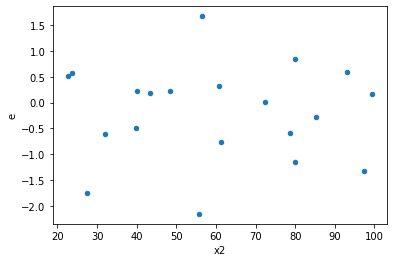

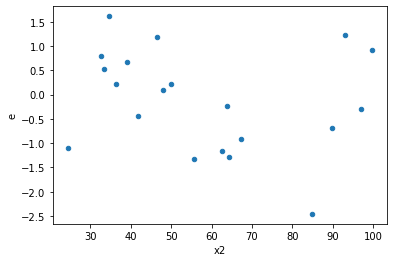

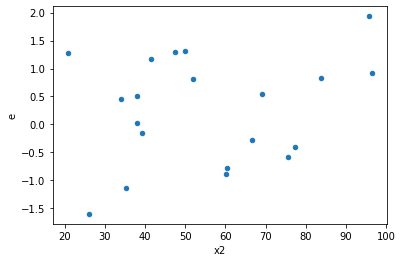

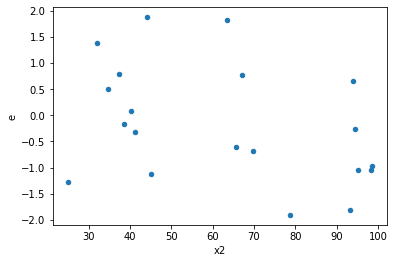

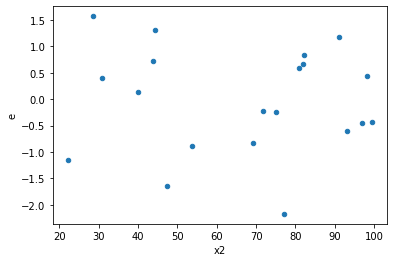

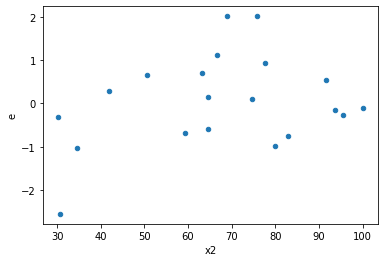

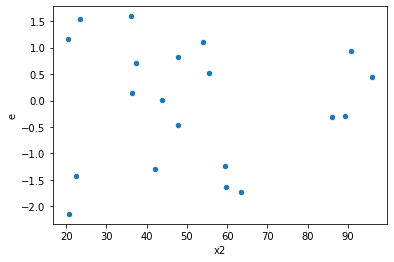

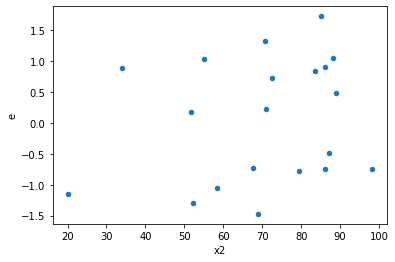

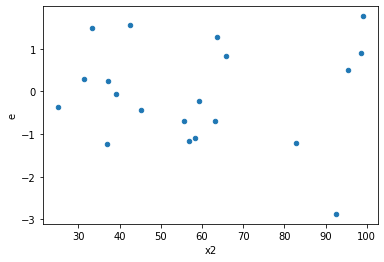

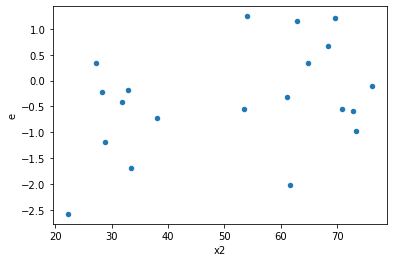

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero 

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,5.0,9.0,5.131196016602106,11.682869958375525,1.2827990041505264,1.4603587447969406,1.2649065226135414,0.8357917903868852,0.5821041048065574,Reject005=1 : Homoscedasticity
2.0,11.0,3.0,6.672666176234687,3.3272527893865833,0.6672666176234687,1.6636263946932917,1.8283436593709173,0.40055970218223247,0.7997201489088838,Reject005=1 : Homoscedasticity
3.0,7.0,7.0,0.7298646955603002,8.421188241769336,0.1216441159267167,1.4035313736282227,11.538012857718218,0.004549830373775654,0.9977250848131122,Reject005=0 : Heteroscedasticity
6.0,7.0,7.0,0.5612308600035661,8.807358863162227,0.09353847666726102,1.467893143860371,15.692934032719197,0.0017401009015469704,0.9991299495492265,Reject005=0 : Heteroscedasticity
7.0,6.0,8.0,2.1501257945957986,4.562182657715023,0.4300251589191597,0.6517403796735747,1.5913659572320509,0.5883779835664735,0.7058110082167632,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,2.3398816125989623,5.412097139544889,0.3899802687664937,0.9020161899241481,2.312979045778963,0.2909828117837252,0.8545085941081374,Reject005=1 : Homoscedasticity
9.0,6.0,8.0,3.8616638254321822,8.387536792900717,0.7723327650864364,1.1982195418429595,1.6290005756706467,0.5688798919058362,0.7155600540470819,Reject005=1 : Homoscedasticity
13.0,8.0,6.0,4.273828219220708,10.973645146753547,0.6105468884601012,2.1947290293507096,3.423517771850452,0.11183154235996318,0.9440842288200184,Reject005=1 : Homoscedasticity
14.0,9.0,5.0,5.270000265871385,3.0030793786095695,0.6587500332339231,0.7507698446523924,1.0257196601115215,0.9143661491628654,0.5428169254185673,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,3.0,11.0,1.7916327641549956,6.228515397462828,0.8958163820774978,0.6228515397462828,0.9481217643901646,0.8145423034238074,Reject005=1 : Homoscedasticity
1.0,5.0,9.0,5.131196016602106,11.682869958375525,1.2827990041505264,1.4603587447969406,1.2649065226135414,1.1642082096131148,Reject005=1 : Homoscedasticity
2.0,11.0,3.0,6.672666176234687,3.3272527893865833,0.6672666176234687,1.6636263946932917,1.8283436593709173,0.40055970218223247,Reject005=1 : Homoscedasticity
3.0,7.0,7.0,0.7298646955603002,8.421188241769336,0.1216441159267167,1.4035313736282227,11.538012857718218,0.004549830373775654,Reject005=0 : Heteroscedasticity
4.0,7.0,7.0,3.1281709854609283,2.3465515242631074,0.5213618309101548,0.3910919207105179,0.7501353139484312,0.7140488699379338,Reject005=1 : Homoscedasticity
5.0,9.0,5.0,18.15108891375734,2.922990694863881,2.2688861142196677,0.7307476737159703,0.28986598411554254,0.1861301611075319,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,0.5612308600035661,8.807358863162227,0.09353847666726102,1.467893143860371,15.692934032719197,0.0017401009015469704,Reject005=0 : Heteroscedasticity
7.0,6.0,8.0,2.1501257945957986,4.562182657715023,0.4300251589191597,0.6517403796735747,1.5913659572320509,1.4116220164335265,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,2.3398816125989623,5.412097139544889,0.3899802687664937,0.9020161899241481,2.312979045778963,0.2909828117837252,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      918
Reject005=0 : Heteroscedasticity     82
Name: Result_test, dtype: int64